In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [2]:
# Define input shape and number of classes
input_shape = (224, 224, 3)
num_classes = 3

# Data directories
train_dir = "C:\\Users\\SRMAPECELAB2023-01\\OneDrive\\Documents\\train"
test_dir = "C:\\Users\\SRMAPECELAB2023-01\\OneDrive\\Documents\\test"
valid_dir = "C:\\Users\SRMAPECELAB2023-01\\OneDrive\\Documents\\valid"

# Data generators with augmentation for train and validation sets
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=32,
    class_mode='categorical'
)

valid_generator = test_datagen.flow_from_directory(
    valid_dir,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(input_shape[0], input_shape[1]),
    batch_size=32,
    class_mode='categorical'
)


Found 4733 images belonging to 3 classes.
Found 3793 images belonging to 3 classes.
Found 2843 images belonging to 3 classes.


In [3]:
# Define pre-trained models
def pretrained_model(model_name, input_shape, num_classes):
    base_model = getattr(tf.keras.applications, model_name)(
        input_shape=input_shape,
        include_top=False,
        weights='imagenet'
    )
    base_model.trainable = False
    model = models.Sequential([
        base_model,
        layers.GlobalAveragePooling2D(),
        layers.Dense(1024, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model


In [4]:
# Instantiate models
vgg_model = pretrained_model("VGG16", input_shape, num_classes)
resnet_model = pretrained_model("ResNet50", input_shape, num_classes)
densenet_model = pretrained_model("DenseNet121", input_shape, num_classes)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 56s 1us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 29s 0us/step
29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


In [5]:
# Compile models
def compile_model(model):
    model.compile(
        optimizer=optimizers.Adam(),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

compile_model(vgg_model)
compile_model(resnet_model)
compile_model(densenet_model)

In [6]:
# Train models
def train_model(model, train_data, valid_data, epochs):
    history = model.fit(
        train_data,
        epochs=epochs,
        validation_data=valid_data
    )
    return history

vgg_history = train_model(vgg_model, train_generator, valid_generator, epochs=15)
resnet_history = train_model(resnet_model, train_generator, valid_generator, epochs=15)
densenet_history = train_model(densenet_model, train_generator, valid_generator, epochs=15)


Epoch 1/15


C:\Users\SRMAPECELAB2023-01\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


148/148 ━━━━━━━━━━━━━━━━━━━━ 462s 3s/step - accuracy: 0.6288 - loss: 0.8329 - val_accuracy: 0.8004 - val_loss: 0.5263
Epoch 2/15
148/148 ━━━━━━━━━━━━━━━━━━━━ 454s 3s/step - accuracy: 0.7604 - loss: 0.6200 - val_accuracy: 0.8194 - val_loss: 0.4595
Epoch 3/15
148/148 ━━━━━━━━━━━━━━━━━━━━ 450s 3s/step - accuracy: 0.7929 - loss: 0.5714 - val_accuracy: 0.8326 - val_loss: 0.4549
Epoch 4/15
148/148 ━━━━━━━━━━━━━━━━━━━━ 449s 3s/step - accuracy: 0.8056 - loss: 0.5156 - val_accuracy: 0.8368 - val_loss: 0.4277
Epoch 5/15
148/148 ━━━━━━━━━━━━━━━━━━━━ 449s 3s/step - accuracy: 0.8048 - loss: 0.5327 - val_accuracy: 0.8445 - val_loss: 0.4054
Epoch 6/15
148/148 ━━━━━━━━━━━━━━━━━━━━ 449s 3s/step - accuracy: 0.8120 - loss: 0.5088 - val_accuracy: 0.8437 - val_loss: 0.4107
Epoch 7/15
148/148 ━━━━━━━━━━━━━━━━━━━━ 450s 3s/step - accuracy: 0.8261 - loss: 0.4790 - val_accuracy: 0.8447 - val_loss: 0.4262
Epoch 8/15
148/148 ━━━━━━━━━━━━━━━━━━━━ 450s 3s/step - accuracy: 0.8231 - loss: 0.4578 - val_accuracy: 0.846

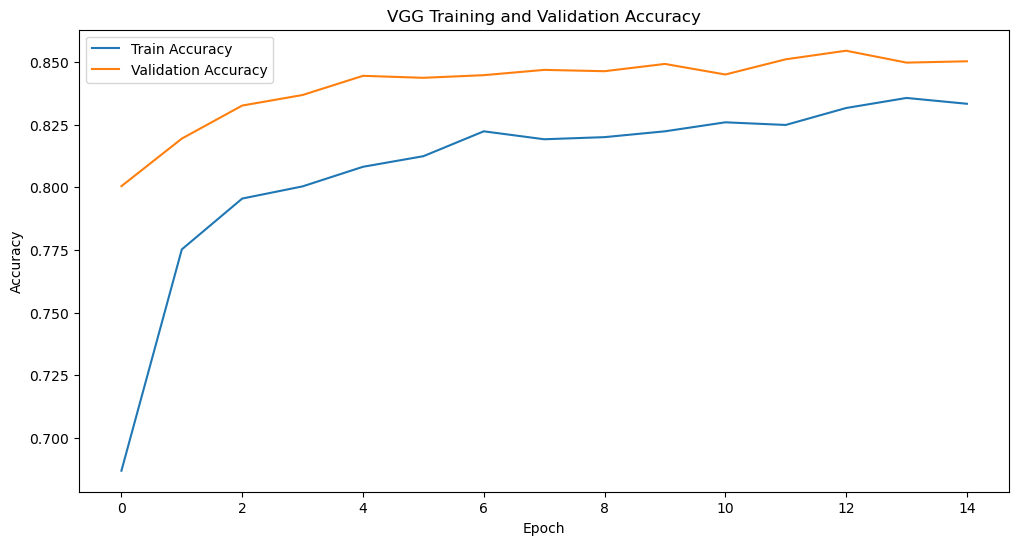

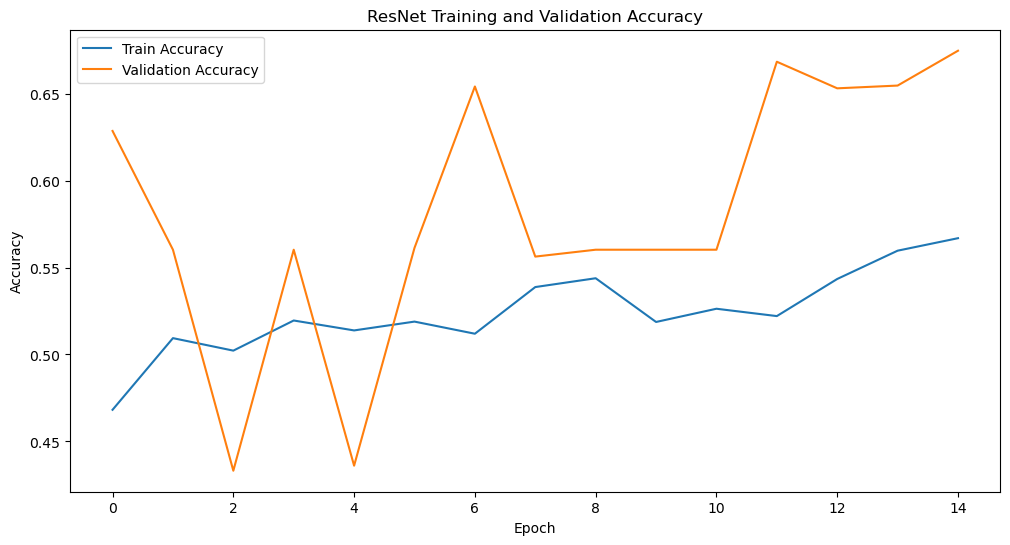

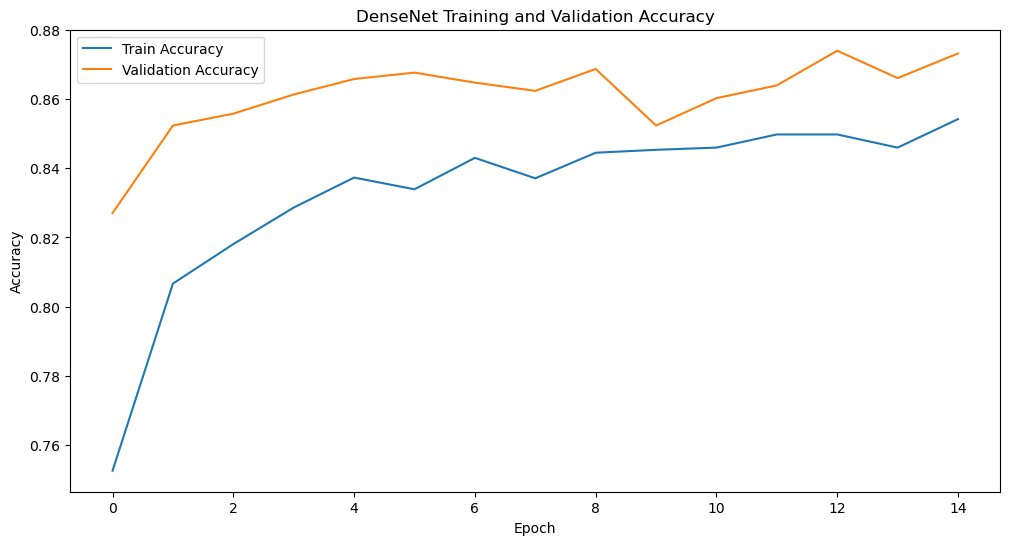

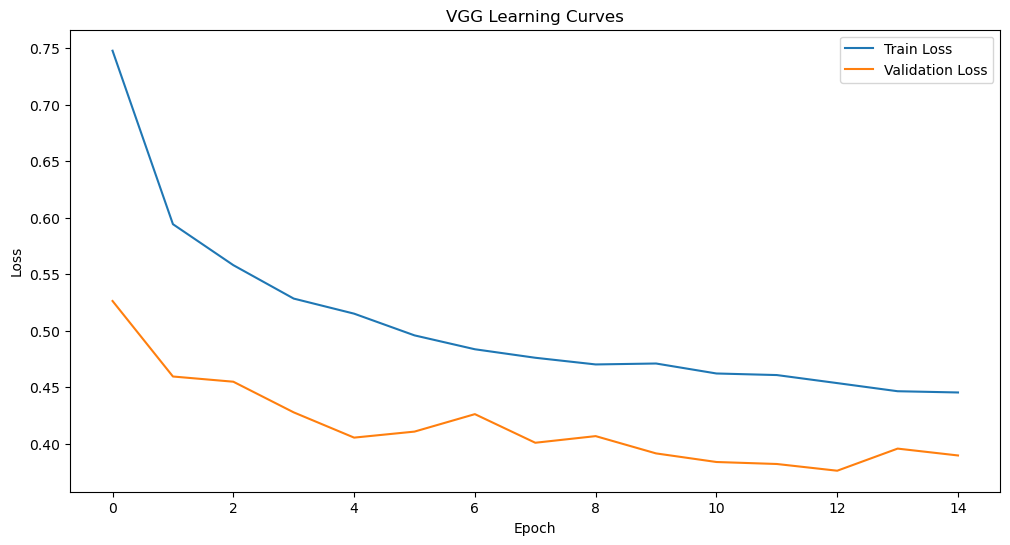

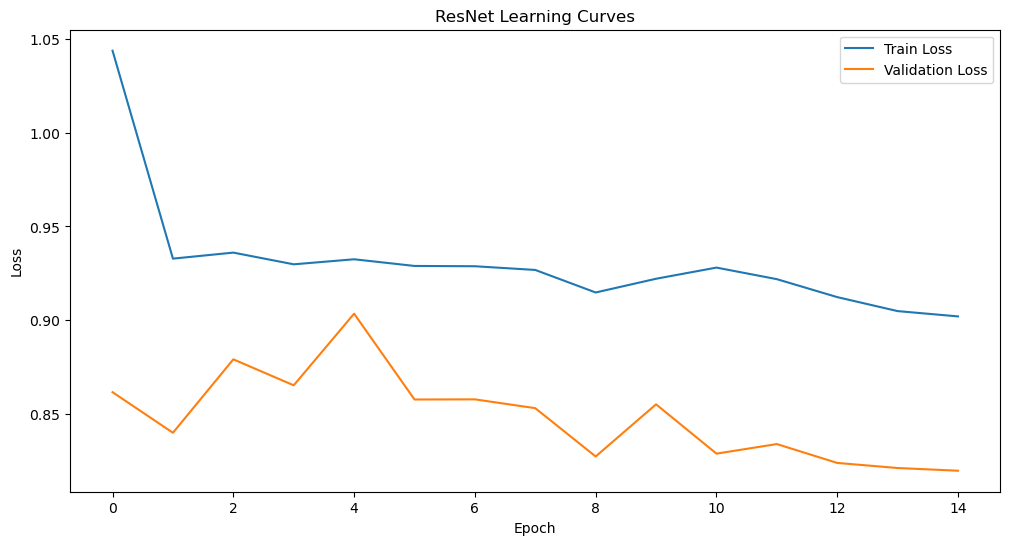

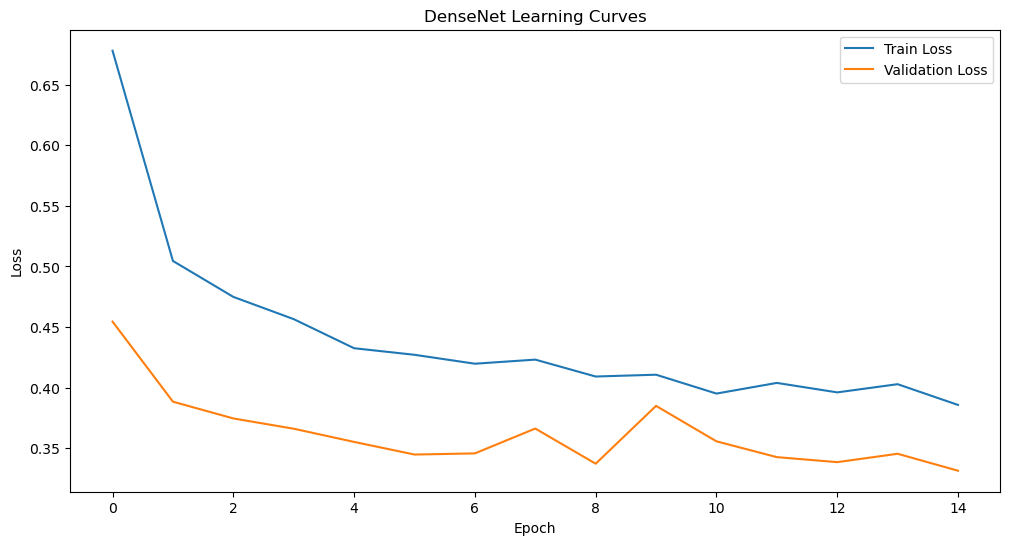

In [8]:
# Plot training history
def plot_history(history, title):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_history(vgg_history, 'VGG Training and Validation Accuracy')
plot_history(resnet_history, 'ResNet Training and Validation Accuracy')
plot_history(densenet_history, 'DenseNet Training and Validation Accuracy')

# Learning Curves Plot
def plot_learning_curves(history, title):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

plot_learning_curves(vgg_history, 'VGG Learning Curves')
plot_learning_curves(resnet_history, 'ResNet Learning Curves')
plot_learning_curves(densenet_history, 'DenseNet Learning Curves')

In [13]:
# Final predictions using decision-level fusion
vgg_pred = vgg_model.predict(test_generator)
resnet_pred = resnet_model.predict(test_generator)
densenet_pred = densenet_model.predict(test_generator)

# Multiply element-wise
final_pred = np.multiply(vgg_pred, resnet_pred)
final_pred = np.multiply(final_pred, densenet_pred)

# Decision level fusion
final_classes = np.argmax(final_pred, axis=1)

print("Final Predictions:", final_classes)

# Calculate single model accuracies
vgg_single_accuracy = np.sum(np.argmax(vgg_pred, axis=1) == test_generator.labels) / len(test_generator.labels)
resnet_single_accuracy = np.sum(np.argmax(resnet_pred, axis=1) == test_generator.labels) / len(test_generator.labels)
densenet_single_accuracy = np.sum(np.argmax(densenet_pred, axis=1) == test_generator.labels) / len(test_generator.labels)

print("VGG Single Model Accuracy:", vgg_single_accuracy)
print("ResNet Single Model Accuracy:", resnet_single_accuracy)
print("DenseNet Single Model Accuracy:", densenet_single_accuracy)

# Calculate ensemble model accuracy
ensemble_accuracy = np.sum(final_classes == test_generator.labels) / len(test_generator.labels)
print("Ensemble Model Accuracy:", ensemble_accuracy)

89/89 ━━━━━━━━━━━━━━━━━━━━ 146s 2s/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 81s 895ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 98s 1s/step
Final Predictions: [2 0 0 ... 2 0 2]
VGG Single Model Accuracy: 0.4882166725290186
ResNet Single Model Accuracy: 0.4801266268026732
DenseNet Single Model Accuracy: 0.47696095673584243
Ensemble Model Accuracy: 0.4931410481885332


In [14]:
# Evaluate models
models = [vgg_model, resnet_model, densenet_model]
model_names = ["VGG", "ResNet", "DenseNet"]

for model, name in zip(models, model_names):
    loss, accuracy = model.evaluate(test_generator)
    predictions = model.predict(test_generator)
    y_true = test_generator.classes
    y_pred = predictions.argmax(axis=1)
    
    # Print precision, recall, and classification report
    print(f"Model: {name}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("Classification Report:")
    print(classification_report(y_true, y_pred))
    print("\n")

89/89 ━━━━━━━━━━━━━━━━━━━━ 148s 2s/step - accuracy: 0.8520 - loss: 0.3972
89/89 ━━━━━━━━━━━━━━━━━━━━ 150s 2s/step
Model: VGG
Confusion Matrix:
[[403  54 639]
 [ 58   5  91]
 [524  92 977]]
Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.37      0.39      1096
           1       0.03      0.03      0.03       154
           2       0.57      0.61      0.59      1593

    accuracy                           0.49      2843
   macro avg       0.34      0.34      0.34      2843
weighted avg       0.48      0.49      0.48      2843



89/89 ━━━━━━━━━━━━━━━━━━━━ 80s 894ms/step - accuracy: 0.6816 - loss: 0.8150
89/89 ━━━━━━━━━━━━━━━━━━━━ 79s 889ms/step
Model: ResNet
Confusion Matrix:
[[462   0 634]
 [ 68   0  86]
 [632   0 961]]
Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.42      0.41      1096
           1       0.00      0.00      0.00       154
           2       0.57

C:\Users\SRMAPECELAB2023-01\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SRMAPECELAB2023-01\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SRMAPECELAB2023-01\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


89/89 ━━━━━━━━━━━━━━━━━━━━ 86s 966ms/step - accuracy: 0.8830 - loss: 0.3169
89/89 ━━━━━━━━━━━━━━━━━━━━ 87s 976ms/step
Model: DenseNet
Confusion Matrix:
[[369  54 673]
 [ 57   7  90]
 [557  72 964]]
Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.34      0.35      1096
           1       0.05      0.05      0.05       154
           2       0.56      0.61      0.58      1593

    accuracy                           0.47      2843
   macro avg       0.33      0.33      0.33      2843
weighted avg       0.46      0.47      0.46      2843





In [16]:
# Print results
for name, loss, accuracy, single_accuracy, precision, recall, f1_score, conf_matrix in all_results:
    print(f"{name} Model Evaluation:")
    print(f"Loss: {loss}")
    print(f"Accuracy: {accuracy}")
    print(f"Single Model Accuracy: {single_accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1_score}")
    print(f"Confusion Matrix:\n{conf_matrix}\n")

# Ensemble predictions using decision-level fusion
def ensemble(models, test_data):
    predictions = [model.predict(test_data) for model in models]
    ensembled_pred = np.prod(predictions, axis=0)
    final_classes = np.argmax(ensembled_pred, axis=1)
    return final_classes

final_classes = ensemble(models, test_generator)
ensemble_accuracy = np.sum(final_classes == test_generator.labels) / len(test_generator.labels)
print("Ensemble Model Accuracy:", ensemble_accuracy)

89/89 ━━━━━━━━━━━━━━━━━━━━ 148s 2s/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 79s 884ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 87s 979ms/step
Ensemble Model Accuracy: 0.47977488568413645


In [17]:
# Multiply element-wise
final_pred = np.multiply(vgg_pred, resnet_pred)
final_pred = np.multiply(final_pred, densenet_pred)

# Decision level fusion
final_classes = np.argmax(final_pred, axis=1)

print("Final Predictions:", final_classes)

Final Predictions: [2 0 0 ... 2 0 2]


In [19]:


# Print predictions before fusion
print("VGG Predictions:", vgg_pred)
print("ResNet Predictions:", resnet_pred)
print("DenseNet Predictions:", densenet_pred)

# Multiply element-wise
final_pred = np.multiply(vgg_pred, resnet_pred)
final_pred = np.multiply(final_pred, densenet_pred)

# Decision level fusion
final_classes = np.argmax(final_pred, axis=1)

print("Final Predictions:", final_classes)


VGG Predictions: [[0.9270429  0.01910828 0.05384876]
 [0.5319343  0.11067142 0.35739428]
 [0.33291325 0.16881754 0.49826914]
 ...
 [0.04546082 0.93297267 0.02156657]
 [0.81622404 0.01824045 0.16553551]
 [0.23753281 0.04008541 0.7223817 ]]
ResNet Predictions: [[0.13066109 0.03851271 0.8308263 ]
 [0.37775925 0.09344739 0.5287934 ]
 [0.4600592  0.11460297 0.42533785]
 ...
 [0.29130727 0.07806489 0.6306278 ]
 [0.43926305 0.11085262 0.44988438]
 [0.37695134 0.094829   0.52821964]]
DenseNet Predictions: [[1.69396419e-02 4.71269523e-05 9.83013213e-01]
 [7.80105531e-01 1.15548544e-01 1.04346000e-01]
 [9.83868361e-01 1.01032285e-02 6.02842169e-03]
 ...
 [3.95382270e-02 7.32089626e-04 9.59729612e-01]
 [2.01028436e-01 2.79149264e-02 7.71056652e-01]
 [3.05812303e-02 2.23840866e-03 9.67180371e-01]]
Final Predictions: [2 0 0 ... 2 0 2]


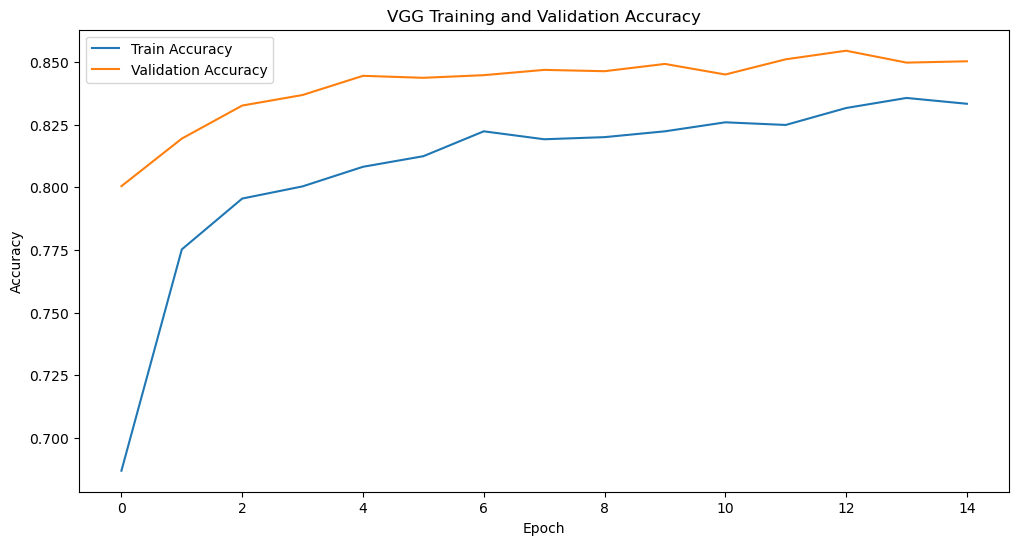

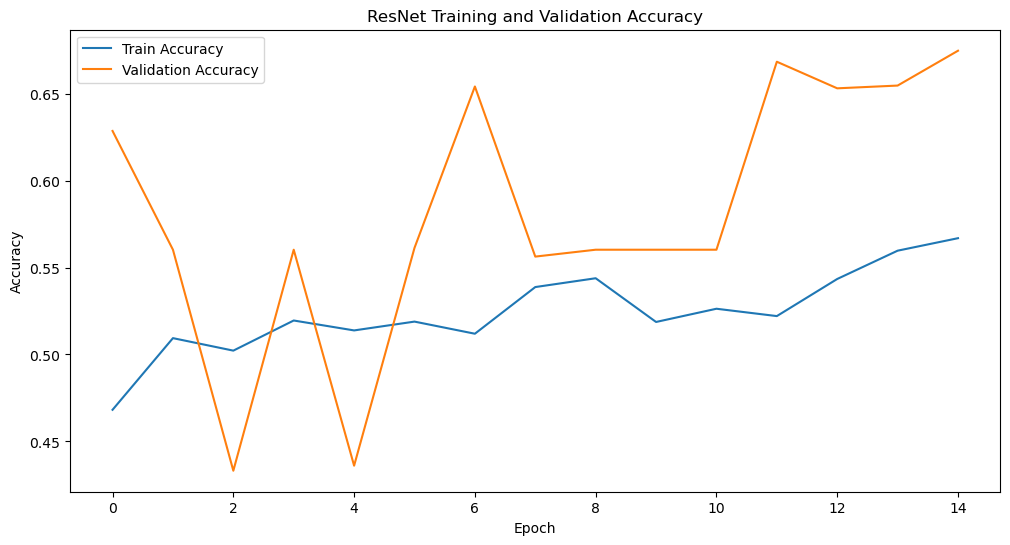

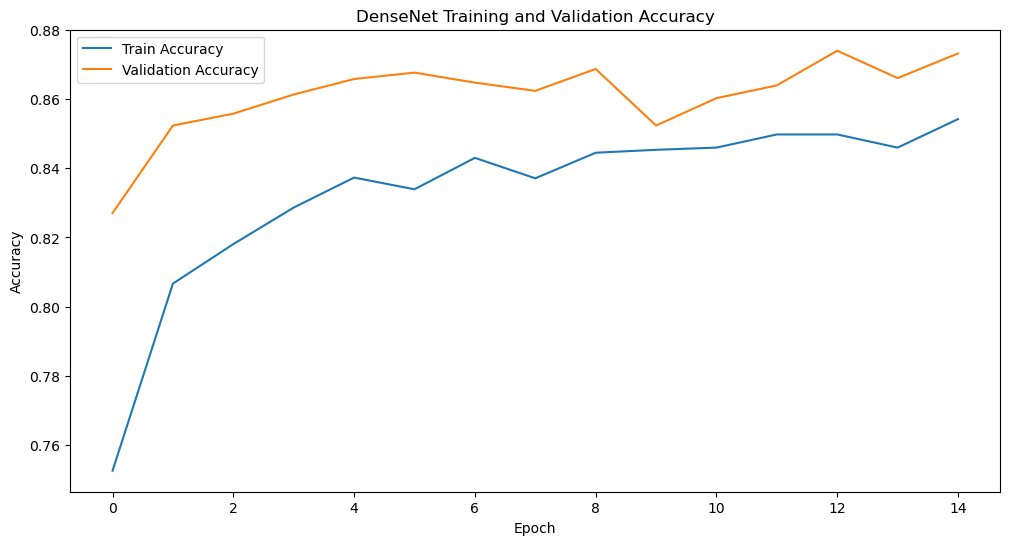

89/89 ━━━━━━━━━━━━━━━━━━━━ 149s 2s/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 84s 940ms/step
89/89 ━━━━━━━━━━━━━━━━━━━━ 87s 974ms/step
Final Predictions: [0 0 2 ... 2 2 2]


In [20]:
# Plot training history
def plot_history(history, title):
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_history(vgg_history, 'VGG Training and Validation Accuracy')
plot_history(resnet_history, 'ResNet Training and Validation Accuracy')
plot_history(densenet_history, 'DenseNet Training and Validation Accuracy')

# Evaluate models on test set
vgg_pred = vgg_model.predict(test_generator)
resnet_pred = resnet_model.predict(test_generator)
densenet_pred = densenet_model.predict(test_generator)

# Multiply element-wise
final_pred = np.multiply(vgg_pred, resnet_pred)
final_pred = np.multiply(final_pred, densenet_pred)

# Decision level fusion
final_classes = np.argmax(final_pred, axis=1)

print("Final Predictions:", final_classes)

In [ ]:
for model, name in zip(models, model_names):
    print(f"{name} Model Summary:")
    model.summary()